# Занятие 8
# Прикладная алгебра и численные методы
## Многочлены Чебышева

In [ ]:
#!python -m pip install sympy --upgrade

In [ ]:
#!python -m pip install -U matplotlib

In [ ]:
import numpy as np
import sympy
from sympy import S, latex, Eq
from sympy.functions.special.polynomials import chebyshevt, chebyshevu
from numpy.polynomial.chebyshev import chebinterpolate
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

In [ ]:
#sympy.__version__, np.__version__

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html#scipy.linalg.norm

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Чебышева первого рода
$T_0(x) = 1$, $T_1(x) = x$, $T_n(x) = 2xT_{n - 1}(x) - T_{n - 2}(x)$, $n\ge 2$.
## Задание 1
Построить графики многочленов Чебышева первого рода при $n$ от 1 до 5 включительно, каждый график отдельным цветом, в легенду включить формулу многочлена в форме $T_1(x) = x$. 

**Использовать matplotlib, lambdify, Eq и многочлены Чебышева chebyshevt из Sympy**

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

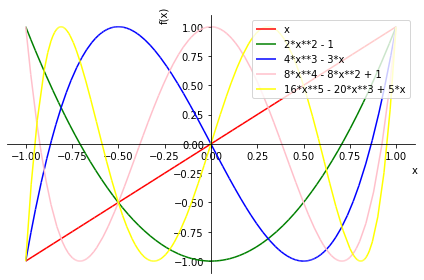

In [ ]:
x = S('x')
def T(n, x):
  if n == 0:
    return 1
  if n == 1:
    return x
  return sympy.expand(sympy.simplify(2 * x * T(n - 1, x) - T(n - 2, x)))

colors = ['red', 'green', 'blue', 'pink', 'yellow']
display(*[Latex(f'T({n},x) = {latex(T(n,x))} ') for n in range(1, 6)])
p = sympy.plot(show = False);
for n in range(1, 6):
  p.extend(sympy.plot(T(n, x), (x, -1, 1), line_color = colors[n - 1], show=False, legend = Latex(f'T({n},x) = {latex(T(n,x))} ')))

p.legend = True
p.show()


## Задание 2.
$$
T_n(x) = \frac{(x + \sqrt{x^2 - 1})^n + (x - \sqrt{x^2 - 1})^n}{2}, \quad |x| \ge 1.
$$
Построить многочлен Чебышева первого рода порядка 9, 11 и 13 по приведенной выше формуле и с помощью chebyshevt из Sympy.

Для каждого порядка 9, 11 и 13 на сетке значений $x$ от 5 до 6 с шагом 0.001 вычислить нормы 1 и 2 разностей значений многочлена Чебышева, полученного по формуле и с помощью chebyshevt.

Изобразить на отдельных графиках многочлены каждого порядка, полученные двумя способами (получится 3 графика)

Использовать plt.show() для изображения отдельного графика и plt.close для того, чтобы следующий график не содержал только что выведенного рисунка.

0.0005567669868469238 0.0854949951171875 12.6875 2.3623073604527974e-05 0.0037126392929600514 0.5770075540560489


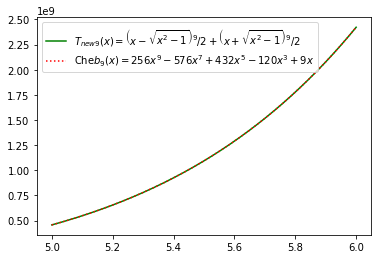

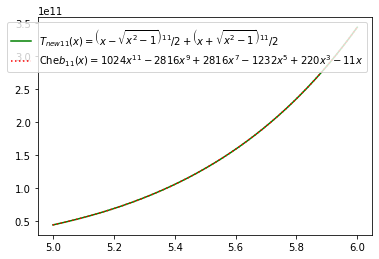

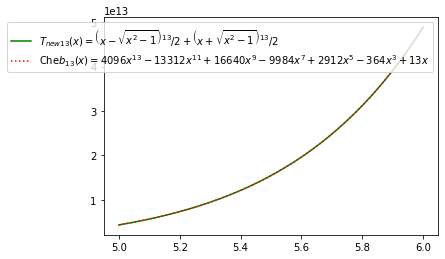

In [ ]:
def T_new(n, x):
  return ((x + sympy.sqrt(x ** 2 - 1)) ** n + (x - sympy.sqrt(x ** 2 - 1)) ** n) / 2

X = np.linspace(5, 6, 1001)


Fo = [sympy.lambdify(x, T_new(n, x))(X) for n in (9, 11, 13)]
Ch = [sympy.lambdify(x, chebyshevt(n, x))(X) for n in (9, 11, 13)]

print(*[np.linalg.norm(Fo[i] - Ch[i], k) for k in [1, 2] for i in range(3)])

for i,n in enumerate([9, 11, 13]):
  plt.plot(X, Fo[i], 'g-', label=sympy.latex(sympy.Eq(S(f'T_new{n}(x)'), T_new(n, x)), mode='inline'))
  plt.plot(X, Ch[i], 'r:', label=sympy.latex(sympy.Eq(S(f'Cheb{n}(x)'), chebyshevt(n, x)), mode='inline'))
  plt.legend()
  plt.show()


## Задание 3
Многочлен Чебышева второго рода:
$$
U_n = \frac{1}{n + 1}T'_{n + 1}(x), \quad n \ge 0.
$$
$$
U_n(x) = \frac{(x + \sqrt{x^2 - 1})^{n + 1} - (x - \sqrt{x^2 - 1})^{n + 1}}{2\sqrt{x^2 - 1}}, \quad |x| \ge 1.
$$

Построить многочлен Чебышева степени 10 по приведенным двум формулам, за основу в первой формуле взять chebyshevt из sympy.
Построить многочлен Чебышева степени 10 с помощью chebyshevu sympy.

При необходимости упростить полученные выражения и сравнить их.

In [ ]:
def U(n, x):
    return (chebyshevt(n + 1, x).diff(x)/(n + 1)).expand().simplify()

def U_new(n, x):
    return (((x + sympy.sqrt(x**2 - 1)) ** (n + 1)\
             - (x - sympy.sqrt(x**2 - 1)) ** (n + 1))\
             / (2 * sympy.sqrt(x ** 2 - 1))).expand().simplify()

ch1 = U(10, x)
ch2 = U_new(10, x)
CH = chebyshevu(10, x)
display(ch1,ch2,CH)

1024*x**10 - 2304*x**8 + 1792*x**6 - 560*x**4 + 60*x**2 - 1

1024*x**10 - 2304*x**8 + 1792*x**6 - 560*x**4 + 60*x**2 - 1

1024*x**10 - 2304*x**8 + 1792*x**6 - 560*x**4 + 60*x**2 - 1

## Задание 4
Норма Чебышева (максимум модуля на данном отрезке):
$$
|f|_0 = \max_{[-1, 1]}|f(x)|.
$$
Площадь между графиком функции на данном отрезке и осью ОХ:
$$
|f|_1 = \int_{-1}^1|f(x)|\,dx.
$$
Вычислить норму Чебышева и площадь между графиком функции и осью ОХ для $\sin(\pi x)$ на отрезке [-1, 1].

In [ ]:
def f(x):
  return sympy.sin(sympy.pi * x)

f_norm0 = sympy.calculus.util.maximum(f(x), x, domain=sympy.Interval(-1, 1))
f_norm1 = sympy.Abs(f(x)).integrate((x, -1, 1))
display(*[Latex('|f4|_{2} = {0} = {1}'.format(latex(item), round(item, 3), i)) for i, item in enumerate((f_norm0, f_norm1))])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Задание 5
Наилучшее приближение функции $f(x)$ многочленом степени $\le n$:
$$
\tilde{f}(x) = \sum_{i=0}^n \frac{<T_i, f>}{<T_i, T_i>}T_i(x),
$$
$T_i(x)$ многочлен Чебышева первого рода степени $i$,
$$
<f, g> = \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1 - x^2}}\,dx, \quad 
|f| = \sqrt{<f, f>} = \sqrt{\int_{-1}^1 \frac{f^2(x)}{\sqrt{1 - x^2}}\,dx}
$$

Построить с помощью Sympy и Numpy многочлен степени не выше 4, наилучшим образом приближающий $x^6 - x^2 + 2$ на [-1, 1]. 

Изобразить на общем графике $x^6 - x^2 + 2$ и приближения многочленами Чебышева, в легенду включить формулы.

Вычислить норму Чебышева и площадь между графиками функции и ее представления полиномами Чебышева.

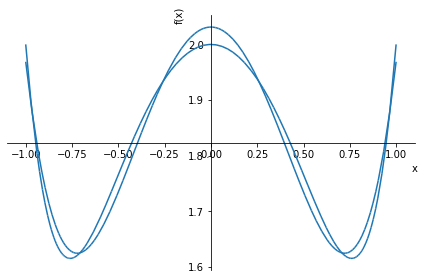

Eq(x**6 - x**2 + 2, 3*x**4/2 - 25*x**2/16 + 65/32)

In [ ]:
def f6(x):
    return x ** 6 - x ** 2 + 2

def dot_prod_cheb(f, g, x):
    return (f * g / sympy.sqrt(1 - x ** 2)).integrate((x, -1, 1))

def f_cheb(f, n, x):
    res = 0
    for k in range(n + 1):
        cheb_k = chebyshevt(k, x)
        coef = dot_prod_cheb(cheb_k, f, x) / dot_prod_cheb(cheb_k, cheb_k, x)
        res += coef * cheb_k
    return res
   
x = S('x')
res6 = f_cheb(f6(x), 4, x)   
sympy.plot((res6, (x, -1, 1)), (f6(x), (x, -1, 1)))  
display(Eq(f6(x), res6))


In [ ]:
f_norm0 = sympy.calculus.util.maximum(f6(x), x, domain=sympy.Interval(-1, 1))
print("норма - ", f_norm0)
f_norm_res = sympy.Abs(res6).integrate((x, -1, 1))
f_norm_f = sympy.Abs(f6(x)).integrate((x, -1, 1))
print("площадь - ", sympy.Abs(f_norm_res - f_norm_f))


норма -  2
площадь -  1/560
